In [327]:
import pandas as pd

In [328]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [329]:
df_bookings.shape

(134590, 12)

In [330]:
df_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [331]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

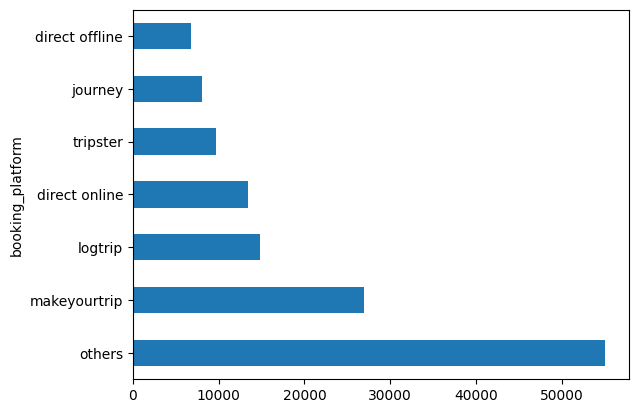

In [332]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [333]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [334]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_rooms = pd.read_csv("datasets/fact_aggregated_bookings.csv")

In [335]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [336]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

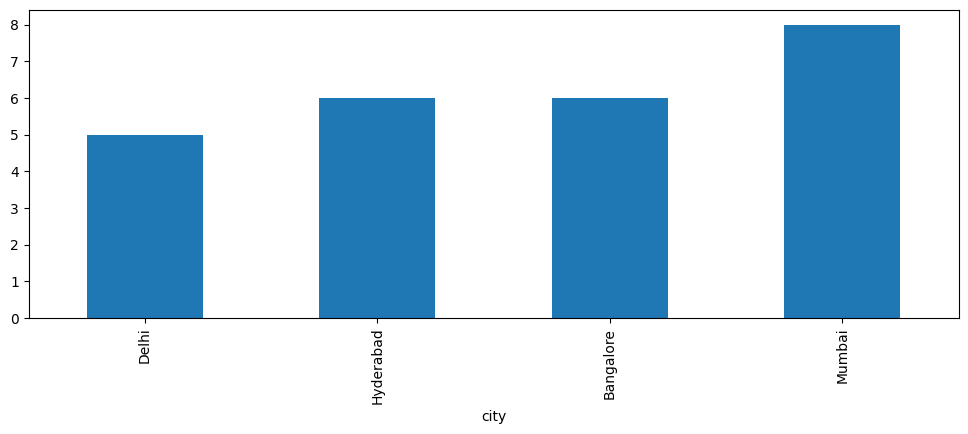

In [337]:
df_hotels.city.value_counts().sort_values().plot(kind='bar',figsize=(12,4))

In [338]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [339]:
df_bookings.shape

(134578, 12)

In [340]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [341]:
avg = df_bookings.revenue_generated.mean()
std = df_bookings.revenue_generated.std()

In [342]:
avg , std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [343]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [344]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [345]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [346]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings.shape

(134573, 12)

In [347]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [348]:
df_bookings[df_bookings.room_category=="RT4"].revenue_generated.describe()

count    16071.000000
mean     27465.457034
std       6310.403418
min      19000.000000
25%      19000.000000
50%      28500.000000
75%      32300.000000
max      45220.000000
Name: revenue_generated, dtype: float64

In [349]:
#No Outliers found

In [350]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [351]:
#No effective null values found 

In [352]:
df_agg_bookings=pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [353]:
df_agg_bookings["occ_pct"]= (df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"])*100        #Occupancy percentage

In [354]:
df_agg_bookings.describe()                                 #Cleaned Occupancy Percentage data

,property_id,successful_bookings,capacity,occ_pct
count,9200.000000,9200.000000,9198.000000,9198.000000
mean,18040.640000,14.655761,25.280496,58.398263
std,1099.818325,7.736170,11.442080,16.064486
min,16558.000000,1.000000,3.000000,21.052632
25%,17558.000000,9.000000,18.000000,47.368421
50%,17564.000000,14.000000,25.000000,56.250000
75%,18563.000000,19.000000,34.000000,66.666667
max,19563.000000,123.000000,50.000000,473.076923


1. What is the average occupancy rate in each of the room categories? 

In [355]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [356]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [357]:
df = pd.merge(df_agg_bookings, df_rooms , left_on= "room_category" , right_on= "room_id")
df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9195,16563,31-Jul-22,RT4,13,18.0,72.222222,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.222222,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.000000,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.000000,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.000000,RT4,Presidential


In [358]:
df.drop("room_category" , axis=1, inplace=True)
df.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,25,30.0,83.333333,RT1,Standard
1,19562,1-May-22,28,30.0,93.333333,RT1,Standard
2,19563,1-May-22,23,30.0,76.666667,RT1,Standard
3,17558,1-May-22,30,19.0,157.894737,RT1,Standard
4,16558,1-May-22,18,19.0,94.736842,RT1,Standard


2. Print average occupancy rate per city

In [359]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [360]:
df = pd.merge(df, df_hotels, on= "property_id")
df.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,25,30.0,83.333333,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,28,30.0,93.333333,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,23,30.0,76.666667,RT1,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,30,19.0,157.894737,RT1,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,18,19.0,94.736842,RT1,Standard,Atliq Grands,Luxury,Delhi


<Axes: xlabel='city'>

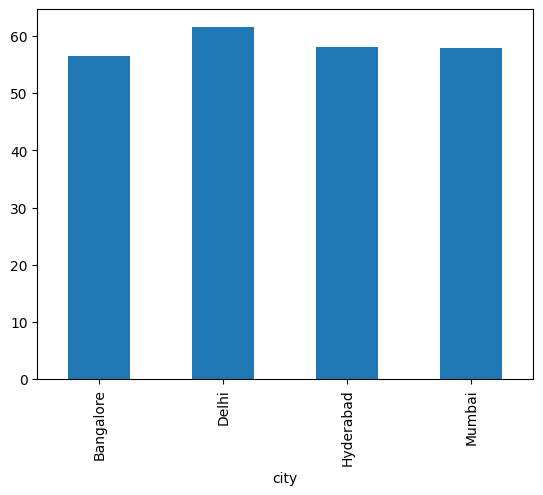

In [361]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

3. When  was the occupancy better? Weekend or Weekdays?

In [362]:
df.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,25,30.0,83.333333,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,28,30.0,93.333333,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,23,30.0,76.666667,RT1,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,30,19.0,157.894737,RT1,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,18,19.0,94.736842,RT1,Standard,Atliq Grands,Luxury,Delhi


In [363]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [364]:
df= pd.merge(df, df_date , left_on="check_in_date", right_on="date")
df.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,15,29.0,51.724138,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,19,30.0,63.333333,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,18,30.0,60.000000,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,16,30.0,53.333333,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,11,19.0,57.894737,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [366]:
df.groupby("day_type")["occ_pct"].mean()

day_type
weekeday    50.903675
weekend     72.393421
Name: occ_pct, dtype: float64

4. In the month of June, What is the occupancy for different cities?

In [367]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [368]:
df_june_22= df[df["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,20,30.0,66.666667,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,19,30.0,63.333333,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,17,30.0,56.666667,RT1,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,9,19.0,47.368421,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,11,19.0,57.894737,RT1,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [369]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values()

city
Bangalore    56.58
Mumbai       58.38
Hyderabad    58.46
Delhi        62.47
Name: occ_pct, dtype: float64

In [370]:
df_august = pd.read_csv("datasets/new_data_august.csv")                        #updating data frame with a new month's data
df_august.head()   

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [371]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [372]:
df.columns

Index(['property_id', 'check_in_date', 'successful_bookings', 'capacity',
       'occ_pct', 'room_id', 'room_class', 'property_name', 'category', 'city',
       'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [373]:
df_august.shape

(7, 13)

In [374]:
df.shape

(6500, 14)

In [375]:
latest_df= pd.concat([df,df_august], ignore_index=True, axis=0)
latest_df.tail()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,room_category,occ%
6502,19563,01-Aug-22,23,30.0,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,RT1,76.67
6503,19558,01-Aug-22,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,RT1,75.00
6504,19560,01-Aug-22,20,26.0,NaN,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,RT1,76.92
6505,17561,01-Aug-22,18,26.0,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,RT1,69.23
6506,17564,01-Aug-22,10,16.0,NaN,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,RT1,62.50


In [376]:
latest_df.shape

(6507, 16)

6.Print revenue realized per city

In [377]:
df_bookings_all= pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [378]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

7. Print month by month revenue

In [379]:
pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [380]:
df_date["date"]= pd.to_datetime(df_date["date"])
df_date.head(5)

C:\Users\haris\AppData\Local\Temp\ipykernel_12492\614732796.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]= pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [381]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [382]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [383]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [384]:
df_bookings_all['check_in_date'] = pd.to_datetime(df['check_in_date'])
df_bookings_all.head()

C:\Users\haris\AppData\Local\Temp\ipykernel_12492\2545138249.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_bookings_all['check_in_date'] = pd.to_datetime(df['check_in_date'])


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-10,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-10,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-10,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-10,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-10,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [396]:
df_bookings_all = pd.merge(
    df_bookings_all, 
    df_date, 
    left_on="check_in_date", 
    right_on="date", 
    suffixes=("_bookings", "_date")
)
df_bookings_all.head()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,week no_bookings,day_type_bookings,date_date,mmm yy_date,week no_date,day_type_date,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-10,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,W 20,weekeday,2022-05-10,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
1,May012216558RT15,16558,27-04-22,2022-05-10,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,...,W 20,weekeday,2022-05-10,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
2,May012216558RT16,16558,1/5/2022,2022-05-10,3/5/2022,2.0,RT1,others,4.0,Checked Out,...,W 20,weekeday,2022-05-10,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
3,May012216558RT17,16558,28-04-22,2022-05-10,6/5/2022,2.0,RT1,others,NaN,Cancelled,...,W 20,weekeday,2022-05-10,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
4,May012216558RT18,16558,26-04-22,2022-05-10,3/5/2022,2.0,RT1,logtrip,NaN,No Show,...,W 20,weekeday,2022-05-10,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday


In [401]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    27776393
Jun 22    26136002
May 22    28065963
Name: revenue_realized, dtype: int64

8. Revenue realized per hotel type

In [403]:
df_bookings_all.property_name.unique()                      #List of hotel types

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [405]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values()

property_name
Atliq Seasons     2984588
Atliq Grands     10412259
Atliq Bay        12169507
Atliq Blu        12388621
Atliq City       13725654
Atliq Palace     14587881
Atliq Exotica    15709848
Name: revenue_realized, dtype: int64

<Axes: title={'center': 'Revenue realized per hotel type'}, xlabel='Property name', ylabel='Revenue realized'>

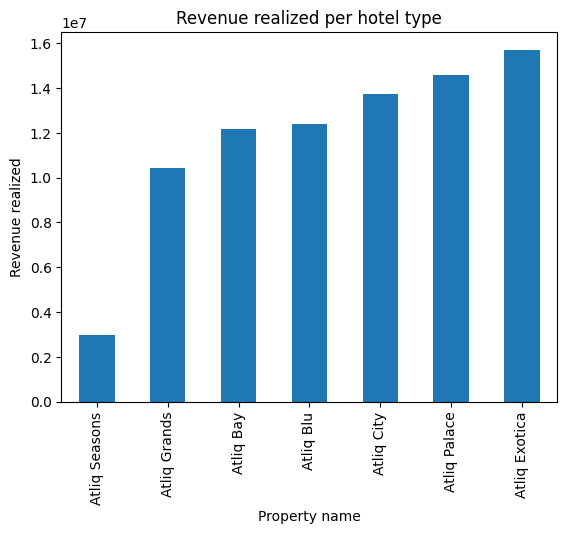

In [410]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values().plot(kind="bar", xlabel='Property name', ylabel='Revenue realized',title="Revenue realized per hotel type")

9.Print average rating per city

In [413]:
df_bookings_all.groupby("city")["ratings_given"].mean().sort_values()

city
Bangalore    3.440336
Hyderabad    3.679083
Mumbai       3.696449
Delhi        3.842657
Name: ratings_given, dtype: float64

<Axes: title={'center': 'Average rating per city'}, xlabel='ratings_given', ylabel='city'>

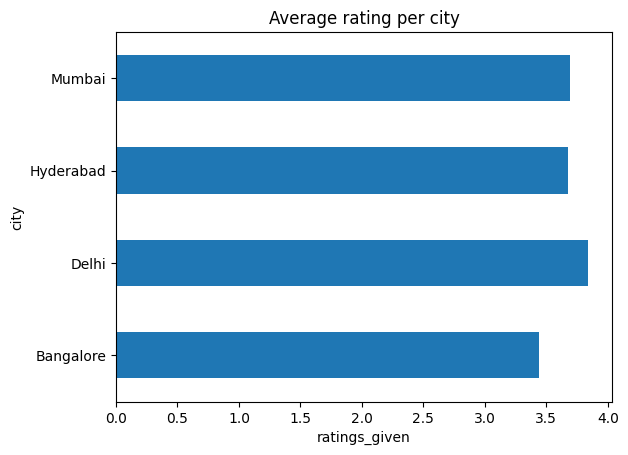

In [414]:
df_bookings_all.groupby("city")["ratings_given"].mean().plot(kind="barh", xlabel='ratings_given', ylabel='city',title="Average rating per city")

10. Print a pie chart of revenue realized per booking platform

In [419]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

booking_platform
direct offline     4133854
direct online      7446944
journey            4684777
logtrip            9058564
makeyourtrip      16698446
others            33816875
tripster           6138898
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

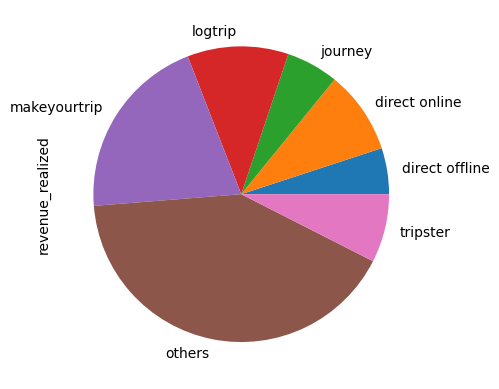

In [420]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")